## Quantium Virtual Internship Task2

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t, ks_2samp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data
data=pd.read_csv('QVI_data.csv')

In [3]:
data.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


In [4]:
data['DATE']=pd.to_datetime(data['DATE'])

In [5]:
#Creating a date-month column
data['MONTH']=data['DATE'].dt.strftime('%Y%m').apply(lambda x: int(x))

In [6]:
data.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903


#### 1. Measures over time for each store

In [7]:
stores=data.groupby(['STORE_NBR', 'MONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique', 'PROD_QTY':'sum'})

In [8]:
stores.rename(columns={'LYLTY_CARD_NBR':'TOT_CUST', 'PROD_QTY':'TOT_CHIP'}, inplace=True)

In [9]:
stores['SALES_PER_CUST']=round(stores['TOT_SALES']/stores['TOT_CUST'],2)
stores['CHIPS_PER_CUST']=round(stores['TOT_CHIP']/stores['TOT_CUST'],2)
stores['AVG_PRICE_PER_UNIT']=round(stores['TOT_SALES']/stores['TOT_CHIP'],2)

In [10]:
stores.head()

TOT_SALES  TOT_CUST  TOT_CHIP  SALES_PER_CUST  \
STORE_NBR MONTH                                                   
1         201807      206.9        49        62            4.22   
          201808      176.1        42        54            4.19   
          201809      278.8        59        75            4.73   
          201810      188.1        44        58            4.27   
          201811      192.6        46        57            4.19   

                  CHIPS_PER_CUST  AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                                       
1         201807            1.27                3.34  
          201808            1.29                3.26  
          201809            1.27                3.72  
          201810            1.32                3.24  
          201811            1.24                3.38

#### 2. Creating a pre-trial dataframe

In [11]:
# Selecting before 2019-02
pre_trial=stores[stores.index.get_level_values('MONTH')<201902]
pre_trial.head()

TOT_SALES  TOT_CUST  TOT_CHIP  SALES_PER_CUST  \
STORE_NBR MONTH                                                   
1         201807      206.9        49        62            4.22   
          201808      176.1        42        54            4.19   
          201809      278.8        59        75            4.73   
          201810      188.1        44        58            4.27   
          201811      192.6        46        57            4.19   

                  CHIPS_PER_CUST  AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                                       
1         201807            1.27                3.34  
          201808            1.29                3.26  
          201809            1.27                3.72  
          201810            1.32                3.24  
          201811            1.24                3.38

#### 3. Creating trial dataframe

In [12]:
trials=pre_trial.loc[[77,86,88]]
trials.head()

TOT_SALES  TOT_CUST  TOT_CHIP  SALES_PER_CUST  \
STORE_NBR MONTH                                                   
77        201807      296.8        51        84            5.82   
          201808      255.5        47        74            5.44   
          201809      225.2        42        70            5.36   
          201810      204.5        37        52            5.53   
          201811      245.3        41        67            5.98   

                  CHIPS_PER_CUST  AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                                       
77        201807            1.65                3.53  
          201808            1.57                3.45  
          201809            1.67                3.22  
          201810            1.41                3.93  
          201811            1.63                3.66

#### 4. Droping Trial stores from pre_trial dataset

In [13]:
pre_trial_nocontrol=pre_trial.drop([77,86,88])
pre_trial_nocontrol.head()

TOT_SALES  TOT_CUST  TOT_CHIP  SALES_PER_CUST  \
STORE_NBR MONTH                                                   
1         201807      206.9        49        62            4.22   
          201808      176.1        42        54            4.19   
          201809      278.8        59        75            4.73   
          201810      188.1        44        58            4.27   
          201811      192.6        46        57            4.19   

                  CHIPS_PER_CUST  AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                                       
1         201807            1.27                3.34  
          201808            1.29                3.26  
          201809            1.27                3.72  
          201810            1.32                3.24  
          201811            1.24                3.38

#### 5. Creating the pro_trial dataframe

In [14]:
# creating dataframe after 2019-04
pro_trial=stores[stores.index.get_level_values('MONTH')>201904]
pro_trial.head()

TOT_SALES  TOT_CUST  TOT_CHIP  SALES_PER_CUST  \
STORE_NBR MONTH                                                   
1         201905      221.4        46        66            4.81   
          201906      174.1        42        53            4.15   
2         201905      192.7        48        56            4.01   
          201906      156.6        40        44            3.92   
3         201905      996.9       108       234            9.23   

                  CHIPS_PER_CUST  AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                                       
1         201905            1.43                3.35  
          201906            1.26                3.28  
2         201905            1.17                3.44  
          201906            1.10                3.56  
3         201905            2.17                4.26

#### 6. Creating functions for correlation tables and standardization tables for trial stores to the control store

In [15]:
# Function to find the correlation
def corlx(store, trial_period):
    list1=[]
    features=trial_period[['TOT_SALES','TOT_CUST']]
    for i in features.index:
        list1.append(features.loc[store].corrwith(features.loc[i[0]]))
    correlations=pd.DataFrame(list1)
    correlations.index=features.index
    correlations=correlations.drop_duplicates()
    correlations.index.name='STORE_NBR'
    return correlations

In [16]:
# Function to find the standardization
def strdx(data):
    data=data.abs()
    data['MAGN']=data.mean(axis=1)
    return data

In [17]:
# Function to find stores more correlated
def findcorlx(store, trial_period):
    corl=corlx(store, trial_period)
    corl=strdx(corl)
    corl=corl.sort_values(['MAGN'], ascending=False).dropna()
    return corl

#### 7. Correlated stores to the control store number 77

In [18]:
corlx77=findcorlx(77,pre_trial)
corlx77

,,TOT_SALES,TOT_CUST,MAGN
STORE_NBR,MONTH,,,
77,201807,1.000000,1.000000,1.000000
233,201807,0.903774,0.990358,0.947066
119,201807,0.867664,0.983267,0.925466
71,201807,0.914106,0.754817,0.834461
3,201807,0.806644,0.834207,0.820426
...,...,...,...,...
256,201807,0.014245,0.047863,0.031054
159,201807,0.001655,0.054404,0.028030
260,201807,0.016618,0.027446,0.022032


**Stores 233,119,71** are the most correlated stores to store 77 so I choose store 233 to be the trial store

In [19]:
def viz_sales(control,trial, column, trial_period):
    sns.kdeplot(trial_period.loc[control][column])
    sns.kdeplot(trial_period.loc[trial][column])
    plt.title(trial)
    plt.legend(labels=[control,trial])

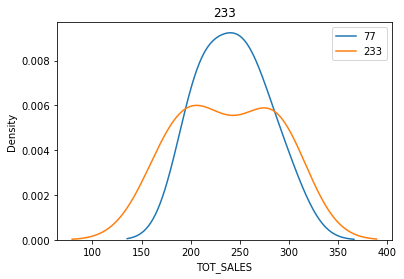

In [20]:
viz_sales(77,233, 'TOT_SALES', pre_trial)

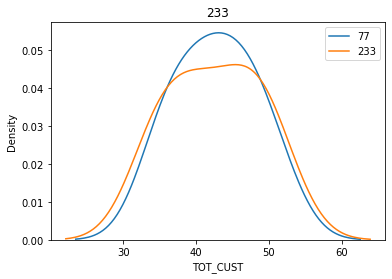

In [21]:
viz_sales(77,233,'TOT_CUST', pre_trial)

**I will choose store 233**

#### 8. Assessment of Trial store 233 and 77 (T-test for trial store and control store)

Null Hypothesis= the means are not significanlty different

In [22]:
assessment1=pd.DataFrame(ttest_ind(pro_trial.loc[77], pro_trial.loc[233])).T
assessment1.columns=['t-statistic','pvalue']
assessment1.index=pro_trial.columns
assessment1

,t-statistic,pvalue
TOT_SALES,-0.010924,0.992276
TOT_CUST,-0.094072,0.933628
TOT_CHIP,0.029399,0.979216
SALES_PER_CUST,0.388589,0.735046
CHIPS_PER_CUST,0.647150,0.583893
AVG_PRICE_PER_UNIT,-0.079809,0.943656


we then reject the null hypothesis for the p-values are greater than 0.05

#### 9. Vizualizing the pro_trial period for 77 and 138

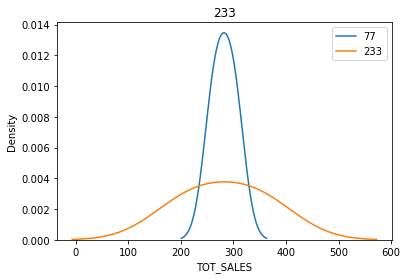

In [23]:
viz_sales(77,233,'TOT_SALES',pro_trial)

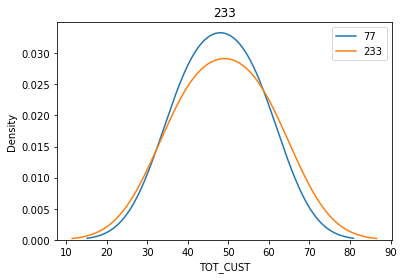

In [24]:
viz_sales(77,233,'TOT_CUST', pro_trial)

According to the results store 77 is different with store 233

#### 10. Correlated Stores and assessment for the control store number 86

In [25]:
corlx86=findcorlx(86,pre_trial)
corlx86

,,TOT_SALES,TOT_CUST,MAGN
STORE_NBR,MONTH,,,
86,201807,1.000000,1.000000,1.000000
155,201807,0.877882,0.942876,0.910379
23,201807,0.784698,0.943559,0.864128
120,201807,0.872693,0.815097,0.843895
114,201807,0.734415,0.855339,0.794877
...,...,...,...,...
91,201807,0.019027,0.041271,0.030149
17,201807,0.029793,0.030039,0.029916
131,201807,0.028487,0.031142,0.029815


I choose store 155

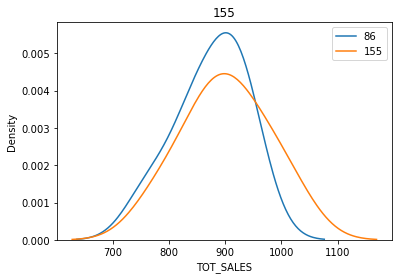

In [26]:
viz_sales(86,155, 'TOT_SALES', pre_trial)

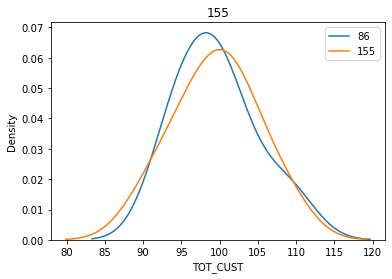

In [27]:
viz_sales(86,155, 'TOT_CUST', pre_trial)

In [28]:
assessment2=pd.DataFrame(ttest_ind(pro_trial.loc[86], pro_trial.loc[155])).T
assessment2.columns=['t-statistic','pvalue']
assessment2.index=pro_trial.columns
assessment2

,t-statistic,pvalue
TOT_SALES,-0.633129,0.591389
TOT_CUST,0.079809,0.943656
TOT_CHIP,-0.404061,0.725279
SALES_PER_CUST,-2.032258,0.179184
CHIPS_PER_CUST,-1.626978,0.245268
AVG_PRICE_PER_UNIT,-0.421637,0.714286


we see that the p-value are lesser than 0.05 so we reject the null hypothesis

#### 11. Pro_trial vizualization for store 86 and 155

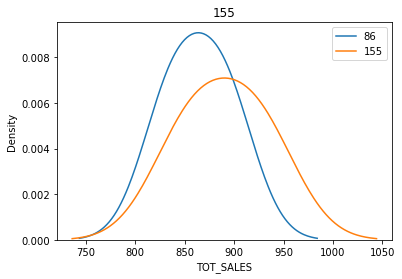

In [29]:
viz_sales(86,155, 'TOT_SALES', pro_trial)

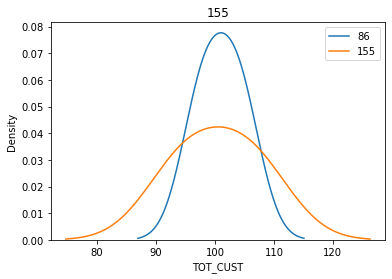

In [30]:
viz_sales(86,155, 'TOT_CUST', pro_trial)

#### 12. Correlated Stores and assessment for the control store number 88

In [31]:
corlx88=findcorlx(88,pre_trial)
corlx88

,,TOT_SALES,TOT_CUST,MAGN
STORE_NBR,MONTH,,,
88,201807,1.000000,1.000000,1.000000
178,201807,0.731857,0.939466,0.835661
14,201807,0.698557,0.942976,0.820767
133,201807,0.735407,0.835426,0.785417
204,201807,0.885774,0.550263,0.718018
...,...,...,...,...
271,201807,0.103037,0.018831,0.060934
177,201807,0.084074,0.005568,0.044821
170,201807,0.027262,0.028583,0.027923


**I will choose store num 178**

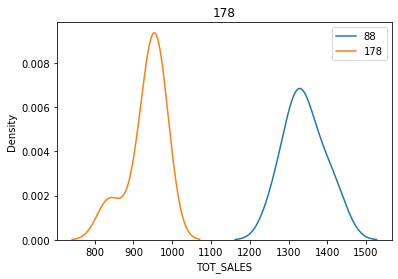

In [32]:
viz_sales(88,178, 'TOT_SALES', pre_trial)

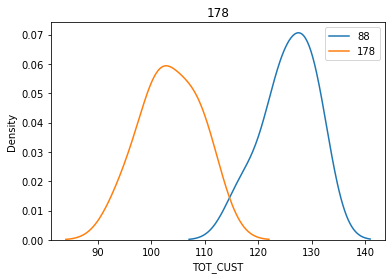

In [33]:
viz_sales(88,178, 'TOT_CUST', pre_trial)

In [34]:
assessment3=pd.DataFrame(ttest_ind(pro_trial.loc[88], pro_trial.loc[178])).T
assessment3.columns=['t-statistic','pvalue']
assessment3.index=pro_trial.columns
assessment3

,t-statistic,pvalue
TOT_SALES,6.125867,0.025628
TOT_CUST,4.505776,0.045892
TOT_CHIP,3.910074,0.059619
SALES_PER_CUST,3.727450,0.065032
CHIPS_PER_CUST,0.116248,0.918077
AVG_PRICE_PER_UNIT,8.192319,0.014575


In this case we will reject the null hypothesis

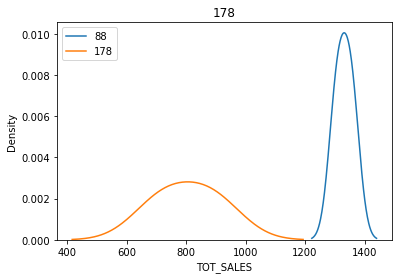

In [35]:
viz_sales(88,178, 'TOT_SALES', pro_trial)

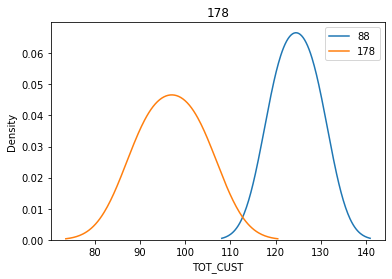

In [36]:
viz_sales(88,178, 'TOT_CUST', pro_trial)

We've found control stores 233, 155, 178 for trial stores 77, 86 and 88
respectively.
The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales.